## Using numpy.histogram2d

This notebook creates some fake satellite data and shows how to do a 2-dimensional histogram to 
look for correlations between two channels

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import os,site
import numpy.random as nr
import warnings

### define two bullseyes using fake data from a 2-d gaussian distribution

Use a 2-dimensional gaussian distribution to define two bullseye clusters with
different means and standard deviations

In [2]:
def makeRandom(meanx=None,stdx=None,meany=None,stdy=None,rho=None,
               numpoints=100000):

    """
    return a tuple with two vectors (xvec,yvec) giving the
    coordinates of numpoints chosen from a two dimensional
    Gauassian distribution

    Parameters
    ----------

    meanx: float -- mean in x direction
    stdx:  float -- standard deviation in x direction
    meany: float -- mean in y direction
    stdy:  float -- standar deviation in y direction
    numpoints:  length of returned xvec and yvec


    Returns
    -------

    (xvec, yvec): tuple of ndarray vectors of length numpoints

    Example
    -------

    invalues={'meanx':450.,
              'stdx':50,
              'meany':-180,
              'stdy':40,
              'rho':0.8}

    chanx,chany=makeRandom(**invalues)


    """
 
    nr.seed(50)
    sigma=np.array([stdx**2., rho*stdx*stdy, rho*stdx*stdy, stdy**2.])
    sigma.shape=[2,2]
    meanvec=[meanx,meany]
    outRandom=nr.multivariate_normal(meanvec,sigma,[numpoints,])
    chan1=outRandom[:,0]
    chan2=outRandom[:,1]
    return (chan1,chan2)

In [3]:
#
# first bullseye centered at (x=450,y= -180)
#
invalues={'meanx':450.,
          'stdx':50,
          'meany':-180,
          'stdy':40,
          'rho':0.8}


chanx,chany=makeRandom(**invalues)

#
# second bullseye centered at (x=50,y=-80)
#
bullseye={'meanx':50.,
          'stdx':14,
          'meany':-80,
          'stdy':14,
          'rho':0.0}

chanxB,chanyB=makeRandom(**bullseye)
chanx=np.concatenate((chanx,chanxB))
chany=np.concatenate((chany,chanyB))

### Show the bullseyes on a scatterplot

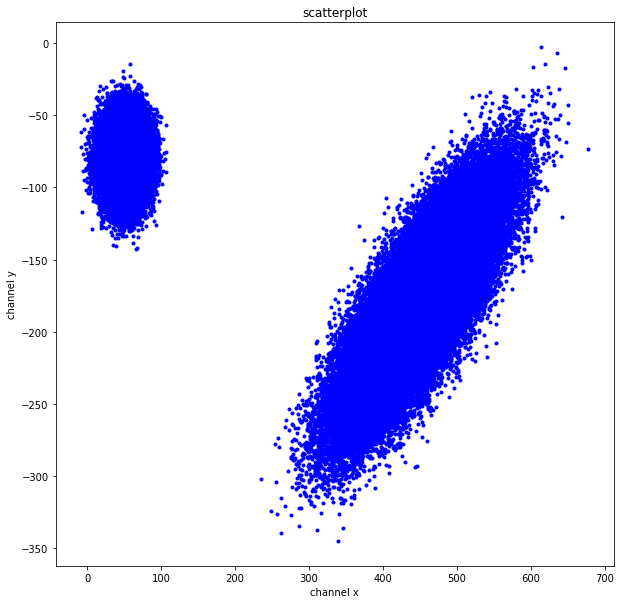

In [11]:
%matplotlib inline   
plt.close('all')
fig1,axis2=plt.subplots(1,1,figsize=(10,10))
fig1.clf()
axis2=fig1.add_subplot(111)
axis2.plot(chanx,chany,'b.')
axis2.set_title('scatterplot')
fig1.savefig('scatter.png')
axis2.set(xlabel="channel x",ylabel='channel y');

### Use histogram2d to bin values into a 2-d histogram

In [5]:
x_num=70
y_num=50
x_bins=np.linspace(0,700,x_num)
y_bins=np.linspace(-400,0,y_num)
H,y_edges,x_edges=np.histogram2d(chany,chanx,bins=(y_bins,x_bins))
y_centers=(y_edges[1:] + y_edges[:-1])/2.
x_centers=(x_edges[1:] + x_edges[:-1])/2.

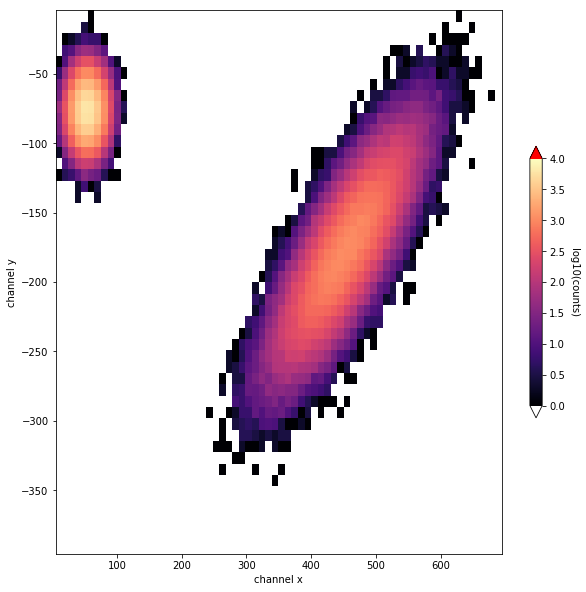

In [10]:
cmap=matplotlib.cm.magma  #see http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
cmap.set_over('r')
cmap.set_under('w')
cmap.set_bad('0.75') #75% grey
vmin= 0
vmax= 4
the_norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)
fig,ax=plt.subplots(1,1,figsize=(10,10))
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cs=ax.pcolormesh(x_centers,y_centers,np.log10(H),norm=the_norm,cmap=cmap)
ax.set(xlabel="channel x",ylabel='channel y');
cax=fig.colorbar(cs, shrink=0.5, pad=0.05,extend='both')
out=cax.ax.set_ylabel('log10(counts)')
out.set_rotation(270)
out.set_verticalalignment('bottom'); 